## Understanding the key aspects of Statistics and Visualization

Descriptive statistics provides us with a description or summary about our data. Inferential statistics allows us to make inferences about our data while exploring relationships.  The goal of the inferential statistics is to draw conclusions from a sample and generalize them to the population. Finally, data visualization, which can be used for descriptive and inferential statistics, helps to give a graphical representation of our data so that we can better see and understand our data.

In [1]:
# Data is from google trends, search terms are "freedom" and "choice"
# Numbers represent the number of searches per month
# source: https://trends.google.com/trends/explore?date=all&geo=US&q=freedom,choice

In [2]:
import pandas as pd
path = 'D:/stat_with_python/data/'

In [3]:
# read data
df1 = pd.read_csv(path+'freedom_choice.csv', skiprows=2)

# rename columns
df1.columns = ['date', 'freedom', 'choice']

# set index column
df1.set_index('date', inplace=True)

# shape of data, row x columns
df1.shape

(194, 2)

In [4]:
# take a look at the head of the data
df1.head()

,freedom,choice
date,,
2004-01,60,56
2004-02,64,51
2004-03,64,51
2004-04,69,58
2004-05,66,50


In [5]:
df1.tail()

,freedom,choice
date,,
2019-10,54,62
2019-11,50,67
2019-12,46,58
2020-01,51,67
2020-02,47,55


# Descriptive Statistics 

In [6]:
# provide summary statistics of data
df1.describe()

,freedom,choice
count,194.000000,194.000000
mean,56.974227,58.448454
std,5.045324,8.510276
min,46.000000,44.000000
25%,53.250000,52.000000
50%,56.500000,57.000000
75%,60.000000,63.000000
max,74.000000,100.000000


In [7]:
# maximum value
df1['freedom'].max()

74

In [8]:
# minimum value
df1['freedom'].min()

46

In [9]:
# calculate range
range_freedom = df1['freedom'].max() - df1['freedom'].min()
range_freedom

28

In [10]:
# mean (average)
df1['freedom'].mean()

56.97422680412371

In [11]:
# median (middle number)
df1['freedom'].median()

56.5

In [12]:
# mode (most frequent value)
df1['freedom'].mode()

0    56
dtype: int64

In [13]:
import matplotlib as plot

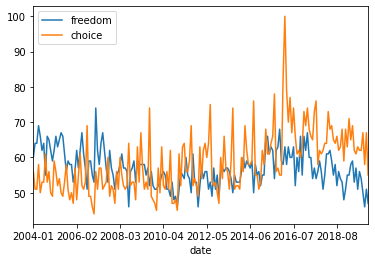

In [14]:
# multi-line graph
df1.plot()

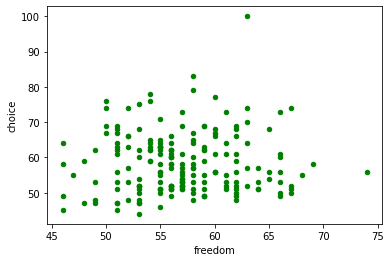

In [15]:
# scatterplot
df1.plot('freedom', 'choice', kind='scatter', color='green')

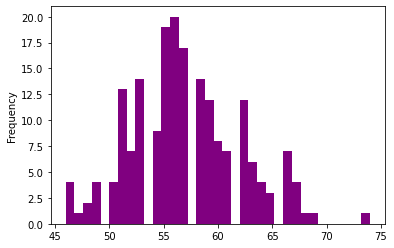

In [16]:
# histogram shows distribution
df1['freedom'].plot(kind='hist', bins=35, color = 'purple')

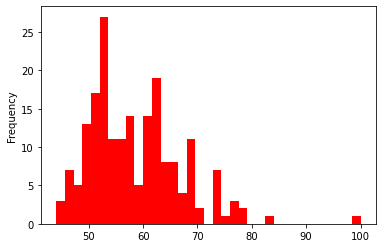

In [17]:
# histogram
df1['choice'].plot(kind='hist', bins = 35, color='red')

### Inferential Statistics

In [18]:
# Correlation is very, very low
result_correlation = df1['freedom'].corr(df1['choice'])
result_correlation

0.03212824774995363

In [20]:
# Let's take a look at a second data set
# google trends data of terms "responsibility" and "choice"
# https://trends.google.com/trends/explore?geo=US&q=personal%20responsibility,individual%20choice
df2 = pd.read_csv(path+'responsibility_choice.csv', skiprows=2)
df2.columns = ['date','responsiblity','choice']
df2.set_index('date', inplace=True)
df2.head()

,responsiblity,choice
date,,
2018-12-30,39,11
2019-01-06,57,29
2019-01-13,67,46
2019-01-20,85,36
2019-01-27,96,33


In [21]:
# Correlation is medium to high
result_corr = df2['responsiblity'].corr(df2['choice'])
result_corr

0.7440330253049601

In [22]:
# Linear Regression as an example of inferential statistics

import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X = df2["choice"] ## X usually means our input variables (or independent variables)
y = df2["responsiblity"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          responsiblity   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     62.00
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.60e-10
Time:                        22:36:40   Log-Likelihood:                -204.53
No. Observations:                  52   AIC:                             413.1
Df Residuals:                      50   BIC:                             417.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1494      4.964      6.679      0.000      23.180      43.119
choice         1.1282      0.143      7.874      0.000       0.840       1.416
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.035
Skew:                           0.064   Prob(JB):                        0.982
Kurtosis:                       2.988   Cond. No.                         98.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Data Visualization

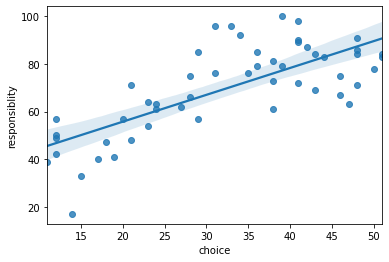

In [23]:
# Regression plot
# The regression line gives us a way to predict y, given x
import seaborn as sns
sns.regplot(y="responsiblity", x="choice",data = df2);

In [24]:
# Find predictions, given X
predictions

date
2018-12-30    45.560183
2019-01-06    65.868683
2019-01-13    85.048933
2019-01-20    73.766433
2019-01-27    70.381683
2019-02-03    79.407683
2019-02-10    79.407683
2019-02-17    86.177183
2019-02-24    85.048933
2019-03-03    65.868683
2019-03-10    63.612183
2019-03-17    81.664183
2019-03-24    79.407683
2019-03-31    77.151183
2019-04-07    71.509933
2019-04-14    90.690183
2019-04-21    73.766433
2019-04-28    87.305433
2019-05-05    76.022933
2019-05-12    64.740433
2019-05-19    59.099183
2019-05-26    46.688433
2019-06-02    56.842683
2019-06-09    60.227433
2019-06-16    59.099183
2019-06-23    55.714433
2019-06-30    46.688433
2019-07-07    54.586183
2019-07-14    52.329683
2019-07-21    53.457933
2019-07-28    50.073183
2019-08-04    46.688433
2019-08-11    46.688433
2019-08-18    56.842683
2019-08-25    76.022933
2019-09-01    72.638183
2019-09-08    79.407683
2019-09-15    82.792433
2019-09-22    77.151183
2019-09-29    76.022933
2019-10-06    68.125183
2019-10-13 

In [25]:
# end